# Mark: 97

### Notes: Data used for marking has correct frequency of 302.4


# Checkpoint 3

**Due: Friday, 4 December, 2020 at 5:00pm GMT**

### Read This First
1. Use the constants provided in the cell below. Do not use your own constants.

2. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. **Additional cells need to be in the proper order such that your code runs correctly the first time through.**

3. **IMPORTANT!** Before submitting your notebook, clear the output by clicking *Restart & Clear Output* from the *Kernel* menu. If you do not do this, the file size of your notebook will be very large.


# NMR spectrum of water

This problem concerns obtaining the nuclear magnetic resonance (NMR) spectrum of water from a raw NMR signal.

Given: a file containing the free-induction decay signal $y(t)$ (electromagnetic radiation emitted by protons in water), following an RF $\pi$-pulse of f=60MHz. The recorded signal is frequency-subtracted, i.e., the radio-frequency output signal has been mixed with the carrier frequency f=60MHz to shift the signal to lower frequencies in the range of hundreds of Hz.

The signal has three main components: the actual NMR signal from protons in water molecules, white noise, and a 50 Hz "mains hum" (electrical signal picked up by the sensitive NMR detector, coming from the mains AC; the signal also contains higher harmonics).

### Hints on how to solve this checkpoint:
- The code must work (and will be tested on) for other data files, in which the frequency of the water peak may differ by 10%. Any 'fine-tuning' of your algorithms so that they only work for the given data file is therefore discouraged.
- Write the code in a modular way so that you can re-use functions from previous tasks. This will save you a lot of time.
- Do not make the code more complex that it needs to be. Classes, complex data structures etc. are not required for this checkpoint.
- Use NumPy/SciPy functions rather than your own implementation whenever possible.
- As in CP1 and CP2, apart from numerical accuracy, efficiency and coding style will also be marked. Try to make your code readable.
- Comment on the results obtained. This may help to get a better mark if there is a problem with the code.

**There are 6 tasks in this CP worth 100 points, plus a bonus task 7 worth 15 points. The total mark will be the sum of all marks, or 100 points, whichever is lower.**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas
import time
from scipy import integrate, optimize

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16

# Task 1 (15p)

Load the data from the file "signals/water_16_samples.csv" and make a plot of the recorded signal versus time for t=[0,0.05), for the first of the 16 samples. Label the axes.

Each row of the data file (except the first which contains table headings) has the following format:

time, s1, s2, s3, ...

where "time" is in seconds, and s1,s2,s3,... represent the NMR signal (arbitrary units) from independent realisations of the experiment. Differences between the samples should be only due to noise; it is the same experiment repeated 16  times.

In [3]:
def csv_data(filepath):
    """
    Loads the data from a selected csv file.
    
    Parameters
    ----------
    filepath : str
        Name of the file to be read 
        
    Returns
    -------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies for the first of the 16 samples
    """
    data = pandas.read_csv(filepath)
    
    time = np.array(data['t'])
    signals = np.array(data['s1'])

    return time, signals

In [4]:
"""
Global variables:

filename: str
    Name of the file to be read and used throughout the notebook
    
tmax: float
    Maximum time to be considered throughout the notebook
    
times, signals: arrays
    Time and signal data extracted from the file
    
t0: float (task 5)
    Decay constant calculated in task 4
    
"""

tmax = 0.5
file = 'signals/water_16_samples_v3.csv'
times, signals = csv_data(file) 

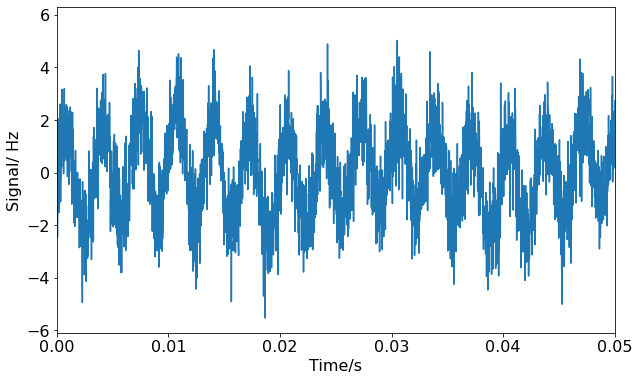

In [5]:
def plot_signal(filepath):
    
    """
    Plots the data extracted from the file up to t=0.05s
    
    Parameters
    ----------
    filepath : str
        Name of the file to be read 
        
    Returns
    -------
    Graph of Signal frequency against time
    """
    
    time, signals = csv_data(filepath)    # extract data
    
    plt.plot(time,signals)                # plot graph
    plt.xlim([0, 0.05])
    plt.xlabel('Time/s')
    plt.ylabel('Signal/ Hz')
    plt.show()
    
plot_signal(file)

### This is a little bit over-engineered, but it's always good to get into the habit of using methods.

### Plot looks good, axes labelled, although the y axis isn't the frequency.

# 14/15

# Task 2 (15p)

Calculate the amplitude spectrum of the NMR signal, and plot it as a function of frequency f [Hertz], for f=0 to 500 Hz. Assume the length of the time series is tmax=0.5s.

**Note: in workshop, you have been plotting wavenumber ($k = \frac{2\pi}{\lambda}$), whereas frequency is $f = \frac{1}{\lambda}$.**

In [6]:
def amplitude_spectrum(time, signal):
    
    """
    Calculate the amplitude spectrum of the NMR signal 
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    Returns
    -------
    amp: array
        Fast Fourier Transform of the full range of signals
    
    filt_amp: array
        Fast Fourier Transform (FFT) of the range of signals near the highest peak in the spectrum
    
    freq: array
        Frequencies for which the FFT has been calculated
    
    freq_peak: float
        Value of the frequency at the peak of the spectrum
    
    """
    
    amp = np.fft.rfft(signal)
    filt_amp = amp.copy()
    
    nn = amp.size
    freq = np.linspace(0, (nn-1)/tmax, nn)                 # create array for frequencies
    
    imaxf = np.abs(amp).argmax()                           # index of the peak
    freq_peak = freq[imaxf]
    
    filt_amp[:nn][np.abs(freq - freq[imaxf])>30] = 0       # remove frequencies within 30 Hz
    
    return amp, filt_amp, freq, freq_peak

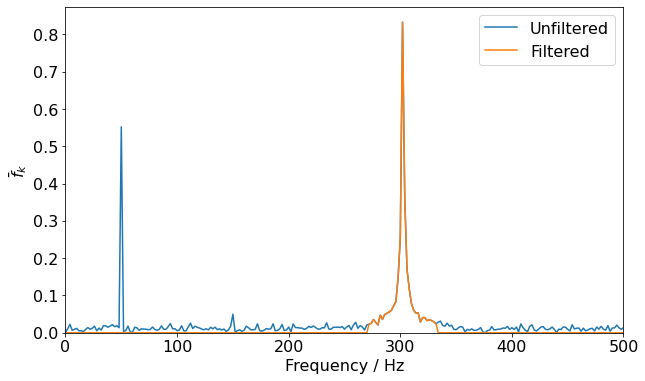

In [7]:
def plot_amplitude(filepath):
    
    """
    Calculate the amplitude spectrum of the NMR signal 
    
    Parameters
    ----------
    filepath : str
        Name of the file to be read 
        
    Returns
    -------
    Plots amplitude spectrum
    
    """
    time, signals = csv_data(filepath)
    amp, filt_amp, freq, freq_peak = amplitude_spectrum(time, signals)
    
    plt.plot(freq, abs(amp)/amp.size, label='Unfiltered')          # divide by hh.size to normalise the signal 
    plt.plot(freq, abs(filt_amp)/amp.size, label='Filtered')
    plt.xlim([0,500])
    plt.ylim(0)
    plt.legend()
    plt.xlabel('Frequency / Hz')
    plt.ylabel('$\\bar{f}_{k}$')
    plt.show()
    
plot_amplitude(file)

### Decent use of methods, comments are good.  Naming convention is a little bit off, not sure if "amp" for the fft spectrum is the best call, however good plots, good implementation of fft and nice touch to also plot the filtered spectrum so we can see whether it's correct or not. 

# 15/15

# Task 3 (15p)

Filter out the noise by passing the signal through a bandpass filter centered at the water peak with a width $\pm$30 Hz. Plot the filtered signal y(t) for t=[0,0.5).

In [8]:
def filtered_signal(time, signal):
    
    """
    Filters out the noise by passing the signal through a bandpass filter centered at 
    the water peak with a width ±30 Hz
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    Returns
    -------
    time: array
        Array of times at which data was recorded (convenient for subsequent tasks)
    
    freq_peak: float
        Value of the frequency at the peak of the spectrum (convenient for subsequent tasks)
    
    filt_sign: array
        compute the inverse FFT to transform the signal from Fourier space back to real space. 
        This is the analog of the and rfft functions introduced previously (hh).
    """
    
    amp, filt_amp, freq, freq_peak = amplitude_spectrum(time, signal)
    
    filt_sign = np.fft.irfft(filt_amp)
    
    return time, freq_peak, filt_sign

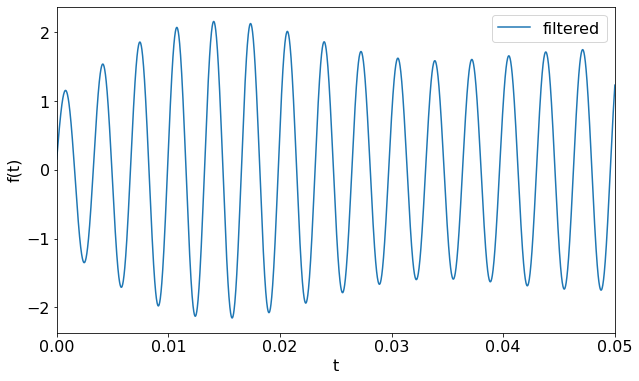

In [27]:
def plot_filtered(time, signal, filepath):
    
    """
    Plots the filtered signal y(t) for t=[0,0.5].
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    filepath: string
        Name of the file to extract the data from
        
    Returns
    -------
    Plot of filtered signal against time
    
    """
    t, freq_peak, filt_sign = filtered_signal(time, signal)
    
    plt.plot(t, filt_sign, label='filtered')
    plt.xlim([0,0.05])
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend()
    plt.show()

plot_filtered(times, signals, file)

### Looks good, no complaints here.

# 15/15

# Task 4 (15p)

Use non-linear curve fitting to fit the function:

$
\Large
\begin{align}
y_{\rm theor}(t) = A \sin(2\pi f_0 t) e^{-t/t_0}
\end{align}
$

to the filtered signal for t=[0,tmax), with unknown parameters $A, f_0, t_0$. Find and print out the best-fit frequency $f_0$. The frequency should be accurate to within 0.01 Hz of the correct answer.

In [10]:
from scipy.optimize import curve_fit

In [11]:
def y_theor(time, A, f0, t0):
    
    """
    Creates the given function 
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    A: float
        Initial guess of the signal amplitude
    
    f0: float
        Initial guess for the best-fit frequency f0
    
    t0: float
        Initial guess for the time corresponding to the best-fit frequency f0
        
    Returns
    -------
    Function: 
    A * np.sin(2 * np.pi * f0 * time) * np.exp(-time/t0): array
        Function that fits the shape of the signal
    
    """
        
    return A * np.sin(2 * np.pi * f0 * time) * np.exp(-time/t0)

In [12]:
def fit_signal(time, signal):
    
    """
    Finds an optimal value for f0 as well as its variance
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    Returns
    -------
    f0: float
        Optimal value for the f0 parameters so that sum of residuals is minimised
        
    error: float
        Variance of the best-fit value of f0
        
    Initial guesses
    ---------------
    A = Max amplitude of the filtered signal
    f0 = Frequency at the maximum amplitude
    t0 = At t0 the amplitude of the signal will have 1/e (~37%) of the initial amplitude

    """

    time, freq_peak, signal = filtered_signal(time, signal)

    A, f0, t0 = max(signal), freq_peak, (1/np.exp(1.0))*max(signal)            # initial guesses for fitting parameters
        
    popt, pcov = curve_fit(y_theor, time, signals, p0=[A, f0, t0])
    var = np.diag(pcov)[-1]                   # variance of t0 is the corresponding element of diagonal of the covariance matrix

    A, f0, t0 = popt
    
    return time, signal, A, float(t0), var, f0

print(f'Best-fit frequency: {fit_signal(times, signals)[-1]} Hz.') 
print(f'Error = {fit_signal(times, signals)[-2]}')

Best-fit frequency: 302.3888657329995 Hz.
Error = 2.7247691593822045e-05


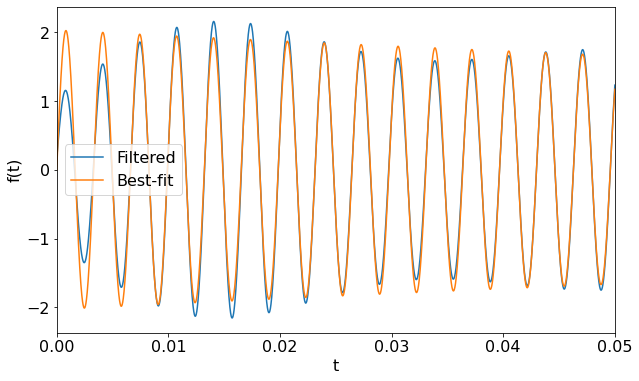

In [28]:
def plot_curve(time, signal):
    
    """
    Plots a graph to visualise how the model fits on the filtered signal for comparison
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    Returns
    -------
    Graph comparing the fit to the signal
    
    """
    time, signal, A, t0, var, f0 = fit_signal(time, signal)

    plt.plot(time, signal, label='Filtered')
    plt.plot(time, y_theor(time, A, f0, t0), label='Best-fit')
    plt.xlim([0,0.05])
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.legend()
plot_curve(times, signals)

### Decent implementation of curve fitting methods, final result presented well and you've plotted the fit over the data, which is generally always a good idea.  One small suggestion would be to plot over a smaller range, like I've modified your code to do above, that way it's a bit clearer as to whether the curve actually fits or not.  Plotting over the whole range results in a rather crowded plot.

# 20/20

In [14]:
print ("There will be tests here. Great job so far!")
### BEGIN HIDDEN TESTS
print ("Correct answer is 307.02739887183554 Hz.")
### END HIDDEN TESTS

There will be tests here. Great job so far!
Correct answer is 307.02739887183554 Hz.


# Task 5 (15p)

Determine $f_0$ in a different way: find the position of the water peak in the amplitude spectrum by fitting the curve

$
\large
\begin{align}
\tilde{y}_{\rm theor}(f) = C + \frac{A}{\sqrt{\lambda^4 + (f^2 - f_0^2)^2 + 2 \lambda^2(f^2 + f_0^2))}}
\end{align}
$

This curve comes from Fourier-transforming the exponentially damped sine function from the previous task, plus a constant C to account for background noise. $\lambda$ denotes the damping rate (inversely proportional to $t_0$ from task 4).

As before, use only the first of the 16 samples for this task. The frequency should be accurate to within 0.01 Hz of the correct answer.

In [15]:
t0 = float(fit_signal(times, signals)[-3])

In [16]:
def yf_theor(f, A, B, C, f0):
    """
    Creates the given function 
    
    Parameters
    ----------
    f: array
        Array of frequencies in the amplitude spectrum
    
    A: float
        Initial guess of the signal amplitude
    
    B: float
        Constant of inverse proportionality 
        
    C: float
        Constant to account for background noise
    
    f0: float
        Value of the best-fit frequency f0
        
    Returns
    -------
    Function:
    C + A/np.sqrt(wavelength**4 + (f**2 - f0**2)**2 + 2*wavelength**2 * (f**2 + f0**2)): array
        Model that fits the shape of the amplitude spectrum
    
    """
    wavelength = B/t0

    return (C + A/np.sqrt(wavelength**4 + (f**2 - f0**2)**2 + 2*wavelength**2 * (f**2 + f0**2)))

In [30]:
def fourier_fit(time, signal):
    
    """
    Finds an optimal value for f0 as well as its variance
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    Returns
    -------
    f0: float
        Optimal value for the f0 parameters so that sum of residuals is minimised
        
    error: float
        Variance of the best-fit value of f0

    Initial guesses
    ---------------
    A = Max amplitude of the filtered signal
    B = Constant of proportionality between damping rate and t0. Damping constant = ln(2)/t0
    f0 = Frequency at the maximum amplitude
    t0 = decay constant which is given by ln(2)/half-life

    """
    
    amp, filt_amp, freq, freq_peak = amplitude_spectrum(time, signal)
        
    A, B, C, f0 = max(abs(filt_amp)), np.log(2.), 1/tmax, freq_peak                # initial guesses for fitting parameters
    
    popt, pcov = curve_fit(yf_theor, freq, abs(filt_amp), p0=[A, B, C, f0])
    
    A, B, C, f0 = popt                        # updated, optimised parameters
    freq_err = (np.diag(pcov))[-1]            # error of calculated frequency is last element of diagonal of covariance matrix
    return filt_amp, freq, A, B, C, f0, freq_err

print(f'Best-fit frequency: {fourier_fit(times, signals)[-2]} Hz.')
print(f'Variance: ± {fourier_fit(times, signals)[-1]} Hz.')

Best-fit frequency: 302.43754397920196 Hz.
Variance: ± 1.4910189546249903e-05 Hz.


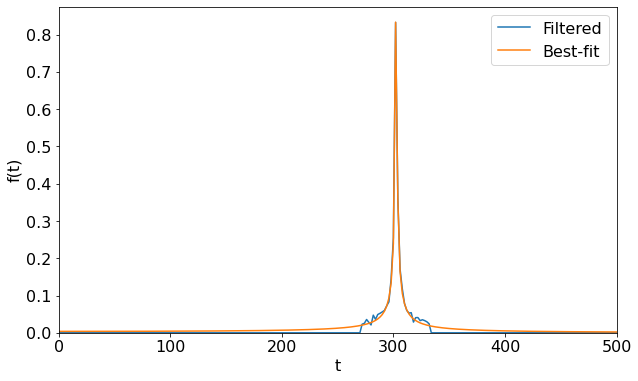

In [32]:
def plot_fourierfit(time, signal):
    
    """
    Plots a graph to visualise how the model fits on the amplitude spectrum for comparison
    
    Parameters
    ----------
    time: array
        Array of times at which data was recorded
    
    signals: array
        Array of the recorded signal frequencies
        
    Returns
    -------
    Graph comparing the fit to the signal
    
    """
    
    filt_amp, freq, A, B, C, f0, freq_err = fourier_fit(time, signal)
    y_fitted = yf_theor(freq, A, B, C, f0)
    
    plt.plot(freq, abs(filt_amp)/filt_amp.size, label='Filtered')
    plt.plot(freq, y_fitted/filt_amp.size, label='Best-fit')
    plt.xlim(0)
    plt.xlabel('t')
    plt.xlim([0,500])
    plt.ylim(0)
    plt.ylabel('f(t)')
    plt.legend()    
    plt.show()
    
plot_fourierfit(times, signals)

### This is very close to perfect.  Unfortunately your answer is just slightly off, this is most likely due to your choice of fitting data.

### Ideally you would have only fitted the peak itself, however you appear to have used the entire fourier spectrum.  Had you taken a sub-sample of the spectrum  around the peak, similar to how we filtered it initially, you would have gotten a much better answer.

### Other than that, very well done.  Plotting the fit and also reporting on the error is a nice touch.

# 17/20

In [19]:
print ("Tests here. Keep it up!")
### BEGIN HIDDEN TESTS
print ("Correct answer is 307.0259606816774 Hz.")
### END HIDDEN TESTS

Tests here. Keep it up!
Correct answer is 307.0259606816774 Hz.


# Task 6 (10p)

Determine the frequency $f_0$ for all 16 data sets using the method from Task 5. Calculate mean $f_0$ and its standard error. The frequency should be accurate to within 0.01 Hz of the correct answer and the standard error should be within 1%.

We will compute the standard error (SE) using:

$
\large
\begin{align}
SE = \frac{\sigma}{\sqrt N}
\end{align}
$

where $\sigma$ is the standard deviation of each best-fit frequency, $f_0$ and N is the number of samples.


In [35]:
def all_signals(filepath, basename):
    
    """
    Extracts data of all signals
    
    Parameters
    ----------
    filepath : str
        Name of the file to be read 
    
    basename: string
        Letter before the number in the name of the labelled signal columns in the csv file 
        e.g. if signals were labelled 'a1', 'a2', etc., the basename would be 'a'.
        
    Returns
    -------
    f0: float
        Optimal value for the f0 parameters so that sum of residuals is minimised
        
    error: float
        Variance of the best-fit value of f0
        
    """
    
    data = pandas.read_csv(filepath)
    signals = []                               # empty list for all signal data
    
    for i in range(1, len(data.columns)):      # loop to extract all signals
        data_set = basename + str(i)           # extract each data set labelled with a basename and number e.g. 's1'
        
        signals.append(data[str(data_set)])    # update list of signal data
    
    return signals

In [36]:
def calculate_params(filepath):
    
    """
    Extracts data of all signals
    
    Parameters
    ----------
    filepath : str
        Name of the file to be read 
        
    Returns
    -------
    mean_freq: float
        Mean value of optimised f0 values for all signals 
        
    st_err: float
        Standard error of mean_freq which is calculated as stated above 
        
    """
    
    signals = all_signals(filepath, 's')
    all_f0 = np.zeros(len(signals))                       # array of zeros to update with mean f0 values
    
    for i in range(len(signals)):                         # find optimised f0 for each signal
        all_f0[i] = fourier_fit(times, signals[i])[-2]
        
    mean_freq = np.average(all_f0)
    
    st_err = np.std(all_f0)/np.sqrt(all_f0.size)          # standard error calculation
    
    return mean_freq, st_err
    
print(f'Mean frequency = {calculate_params(file)[0]} Hz')
print(f'Standard error = ± {calculate_params(file)[1]} Hz')

Mean frequency = 302.45693484457234 Hz
Standard error = ± 0.008323381311489566 Hz


### Your approach here is along the right lines, answer is a bit off due to the fitting error mentioned above.

### You also call your calculate_params method twice unnecessarily, something along the lines of 

mean, err = calculate_params(file)

### would have been preferable.

# 13/15

In [22]:
print ("Tests here. Almost there!")
### BEGIN HIDDEN TESTS
print ("Correct answer is 307.02512789912225 +/-0.0030984386682696465 Hz.")
### END HIDDEN TESTS

Tests here. Almost there!
Correct answer is 307.02512789912225 +/-0.0030984386682696465 Hz.


# Bonus: Task 7 (15p)

Find the 95% equally-tailed credible interval of $f_0$ from task 5 using Bayesian inference.

Use only the first of the 16 samples for this task. Assume the spectrum can be modelled by the curve from task 5, with $C=0$ and random noise superimposed on the curve. The noise should be generated as independent, identically distributed random numbers $\{\chi_k\}$ drawn from the Chi distribution with two degrees of freedom and unknown amplitude $\sigma$, so that the amplitude spectrum is

$
\large
\begin{align}
\tilde{y}_k = \frac{A}{\sqrt{\lambda^4 + (f_k^2 - f_0^2)^2 + 2\lambda^2(f_k^2 + f_0^2))}} + \sigma \chi_k
\end{align}
$

where $f_k = k/t_{max}$. The rationale for using the Chi distribution comes from Fourier-transforming Gaussian noise and taking its modulus (to plot the amplitude spectrum).

Does the average value of $f_0$ obtained in task 6 lie in the credible interval? The bounds of the interval should be accurate to within 0.01 Hz of the correct answer.

In [23]:
def model(sigma):
    y_model = fourier_fit(times,signals)[0] + sigma * np.random.chisquare(2)
    return y_model

In [24]:
#function to compute the "distance" between the model and the data.
def distance(sigma):
    h, freq, A, B, C, f0, freq_err = fourier_fit(times, signals)
    y_model = model(sigma)
    y_data = amplitude_spectrum(times, signals)[0]

    distance = ((y_data-y_model)**2).sum()
    return distance

In [25]:
def ABC(nreps, epsilon, ranges, model_func, dist_func):
    """
    Perfrom Approximate Bayesian computation.
    
    Parameters
    ----------
    nreps : int
        The number of trials.
    epsilon : float
        The maximum distance for a model to be accepted.
    ranges : list of lists of floats
        A list of min, max values for each model parameter.
    model_func : function
        Model function.
    dist_func : function
        Distance function.
        
    Returns
    -------
    selected : array
        Parameters of the accepted models.
    """
    
    selected = []
    
    for i in range(nreps):
        # Create random parameters for each of the provided ranges.
        pars = [np.random.uniform(r) for r in ranges]

        # Compute the distance between the model and the data.
        dist = dist_func(amplitude_spectrum(times, signals)[0], model_func(pars))

        # Keep the parameters if the model is accepted.
        if dist < epsilon:
            selected.append(pars)

    print(f"Epsilon: {epsilon}, accepted sets: {len(selected)} ({100*len(selected)/nreps}%).")
    return np.array(selected)

In [26]:
ranges = [300, 310]

eps_vals = np.linspace(4, 7, 9)
n_trials = 100000

acceptance = []
stddev = []

for my_eps in eps_vals:
    sel = ABC(n_trials, my_eps, ranges, model, distance)
    acceptance.append(len(sel))
    stddev.append(sel[:, 0].std())

plt.scatter(eps_vals, acceptance)
plt.xlabel("epsilon")
plt.ylabel("no. of accepted sets")
plt.yscale("log")
plt.show()

plt.scatter(eps_vals, stddev)
plt.xlabel("epsilon")
plt.ylabel("std. dev. of w")
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

### I get an error when I run your code unfortunately so it's hard to say how accurate it is.  However I can see you've at least started to put some work in.

# 3/15

In [ ]:
print ("Tests. Nice work!")
### BEGIN HIDDEN TESTS
print ("Correct answer is 307.0135004796544 to 307.0383588402427 Hz.")
### END HIDDEN TESTS